In [1]:
from google.colab import drive
import sys
import pandas as pd
import numpy as np


In [2]:
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# **Load the data**

In [3]:
# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/'


Mounted at /content/drive


In [4]:
#Loading the data
transactions=pd.read_csv(abspath_curr+'transactions.csv',index_col=[0])
transactions


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,1.0,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,1.0,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,1.0,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,1.0,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90.0,1.0,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,NaN,1095.04,NaN,NaN,NaN,False,NaN,NaN,False,False
786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,9.0,1.0,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,NaN,1214.96,NaN,NaN,NaN,False,NaN,NaN,False,False
786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,2.0,1.0,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,NaN,1233.85,NaN,NaN,NaN,False,NaN,NaN,False,False
786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,9.0,99.0,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,NaN,1283.28,NaN,NaN,NaN,False,NaN,NaN,False,False


## Data Structure

In [5]:
np.array(transactions.columns)

array(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode',
       'posConditionCode', 'merchantCategoryCode', 'currentExpDate',
       'accountOpenDate', 'dateOfLastAddressChange', 'cardCVV',
       'enteredCVV', 'cardLast4Digits', 'transactionType', 'echoBuffer',
       'currentBalance', 'merchantCity', 'merchantState', 'merchantZip',
       'cardPresent', 'posOnPremises', 'recurringAuthInd',
       'expirationDateKeyInMatch', 'isFraud'], dtype=object)

In [6]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  float64
 10  posConditionCode          785954 non-null  float64
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [7]:
# Get the number of rows and columns
rows = len(transactions.axes[0])
cols = len(transactions.axes[1])

# Print the number of rows and columns
print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

Number of Rows: 786363
Number of Columns: 29


In [8]:
#Count the NaNs
transactions.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

##Basic Summary Statistics

In [9]:
# basic summary statistics
transactions[['creditLimit','availableMoney','transactionAmount','currentBalance']].describe()

,creditLimit,availableMoney,transactionAmount,currentBalance
count,786363.000000,786363.000000,786363.000000,786363.000000
mean,10759.464459,6250.725369,136.985791,4508.739089
std,11636.174890,8880.783989,147.725569,6457.442068
min,250.000000,-1005.630000,0.000000,0.000000
25%,5000.000000,1077.420000,33.650000,689.910000
50%,7500.000000,3184.860000,87.900000,2451.760000
75%,15000.000000,7500.000000,191.480000,5291.095000
max,50000.000000,50000.000000,2011.540000,47498.810000


In [33]:
# count unique 
transactions.nunique()

accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              521862
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       4
merchantCountryCode              4
posEntryMode                     5
posConditionCode                 3
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5245
transactionType                  3
echoBuffer                       0
currentBalance              487318
merchantCity                     0
merchantState                    0
merchantZip                      0
cardPresent                      2
posOnPremises                    0
recurringAuthInd                 0
expirationDateKeyInMatch         2
isFraud             

In [34]:
# drop the colums containing all NaNs
transactions.drop(['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'],axis=1,inplace=True)

# **Data Visulizaiton**

## BoxPlot

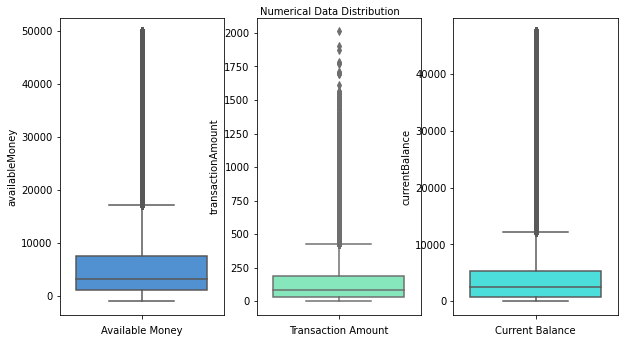

In [32]:
#Box Plots of numberical features
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(10,5))
sns.boxplot(y=transactions['availableMoney'],ax=ax[0],color='#3C91E6',orient="v")
ax[0].set_xlabel('Available Money', fontsize=10)
sns.boxplot(y=transactions['transactionAmount'],ax=ax[1],color='#76F7BF',orient="v")
ax[1].set_xlabel('Transaction Amount', fontsize=10)
sns.boxplot(y=transactions['currentBalance'],ax=ax[2],color='#34F6F2',orient="v")
ax[2].set_xlabel('Current Balance', fontsize=10)
#colors = ['#3C91E6', '#76F7BF', '#34F6F2', '#59C9A5']
plt.suptitle('Numerical Data Distribution', fontsize=10)
fig.subplots_adjust(top=0.95)

## Histogram

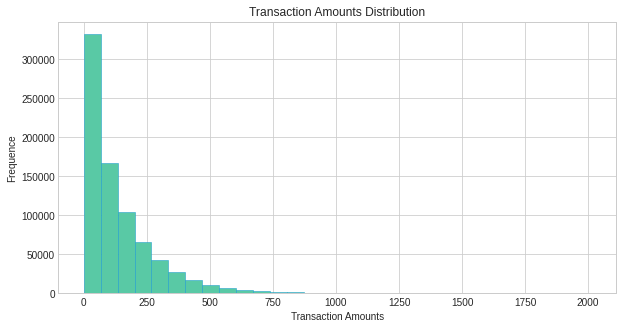

In [40]:
# Histogram of 'transactionAmount'
plt.figure(figsize=(10,5)) 
plt.style.use('seaborn-whitegrid') 
plt.hist(transactions['transactionAmount'], bins=30, facecolor = '#59C9A5', edgecolor='#169acf', linewidth=0.5)
plt.title('Transaction Amounts Distribution') 
plt.xlabel('Transaction Amounts') 
plt.ylabel('Frequence') 
plt.show()

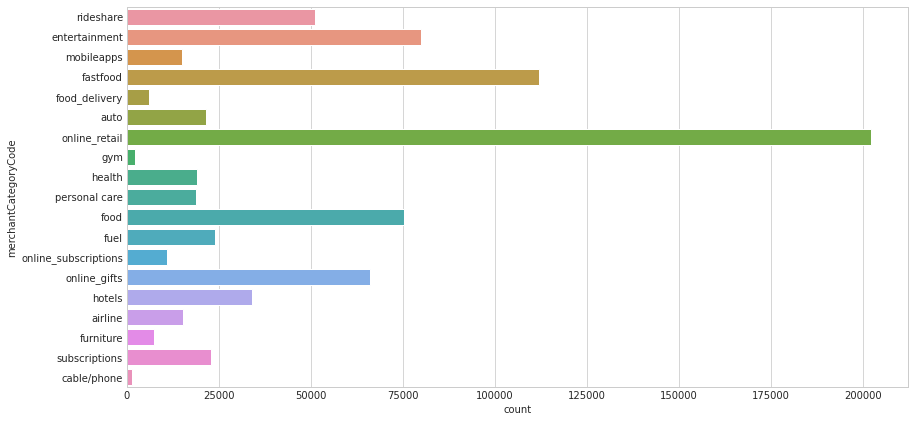

In [102]:
fig,ax = plt.subplots(figsize =(14, 7))
sns.set_theme()
sns.countplot(y='merchantCategoryCode', data=transactions,orient='v')

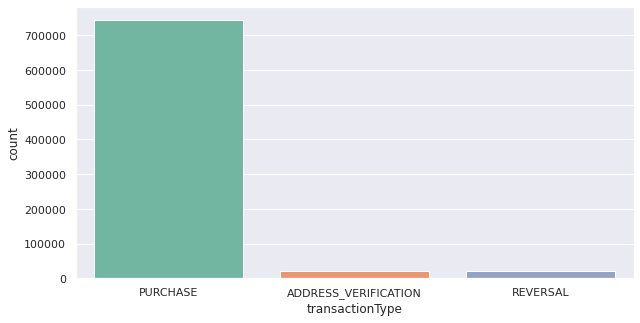

In [114]:
fig,ax = plt.subplots(figsize =(10, 5))

sns.countplot(x='transactionType', data=transactions,palette='Set2')


# **Data Exploration**

## Columns Match

In [43]:
#Check whether 'customerId' and 'accountNumber' are the same
transactions['compare_id'] = np.where(transactions["customerId"] == transactions["accountNumber"], True, False)
transactions.compare_id.value_counts()

True    786363
Name: compare_id, dtype: int64

Column 'customerId' and 'accountNumber' are completely the same.

In [132]:
transactions['CVV_match'] = np.where(transactions["cardCVV"] == transactions["enteredCVV"], True, False)
transactions.CVV_match.value_counts()

True     779348
False      7015
Name: CVV_match, dtype: int64

There are few transactions which CVV can not match.

## Distribution of Credit Limit

In [44]:
# Show all the data types
transactions.creditLimit.unique()

array([ 5000.,  2500., 50000., 15000., 10000.,   250.,   500.,  1000.,
        7500., 20000.])

Text(0, 0.5, 'Frequence')

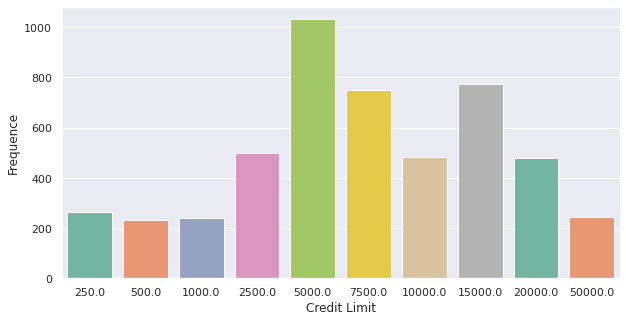

In [118]:
cust_limit=transactions[['customerId','creditLimit']].drop_duplicates()
fig,ax = plt.subplots(figsize =(10, 5))
sns.countplot(x='creditLimit', data=cust_limit,palette='Set2')
plt.xlabel("Credit Limit")
plt.ylabel("Frequence")


We can see that Capital One offers 5000, 15000 or 7500 as credit limit to its customers mostly.

## Imbalanced Dataset

In [131]:
transactions['merchantCountryCode'].value_counts()

US     778511
MEX      3143
CAN      2426
PR       1559
Name: merchantCountryCode, dtype: int64

In [105]:
# Imbalanced Data
transactions['isFraud'].value_counts()

False    773946
True      12417
Name: isFraud, dtype: int64

In [106]:
12417/(773946+12417)

0.01579041740264992

This dataset is a highly imbalanced dataset.

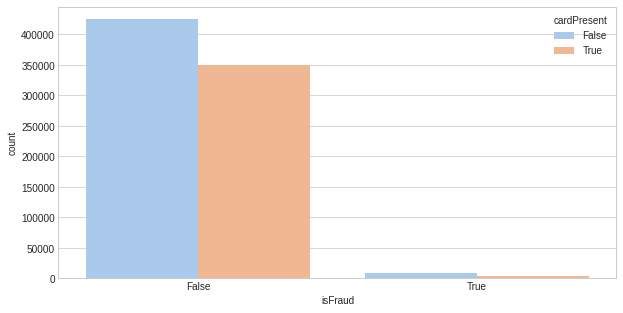

In [95]:
fig,ax = plt.subplots(figsize =(10, 5))
sns.countplot(hue="cardPresent", x="isFraud", data=transactions,palette="pastel")

We can see that transactions without card are more likely to be fraud. However, it is an imbalanced dataset and it is hard to come to a conclusion.

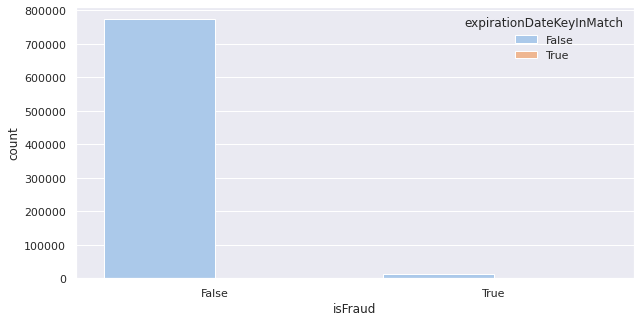

In [120]:
fig,ax = plt.subplots(figsize =(10, 5))
sns.countplot(hue="expirationDateKeyInMatch", x="isFraud", data=transactions,palette="pastel")

I want to find whether it is more likely to be fraud when Expiration Date Key does not match. But it seems like most expiration date key does match. It is hard to tell the relationship with fraud detection.